<a href="https://colab.research.google.com/github/namanraiyani/PyTorch_Practice/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [26]:
torch.manual_seed(13)

In [27]:
x_train = np.array([[2.5], [3.8], [5.1], [6.3], [7.0], [3.5],
                        [8.5], [5.7], [7.8], [1.9], [6.5],
                        [9.8], [4.9], [8.1], [2.2]], dtype=np.float32)

y_train = np.array([[1.4], [2.2], [2.9], [3.4], [3.7], [2.0],
                        [4.1], [3.1], [3.9], [1.1], [3.5],
                        [4.6], [2.8], [4.2], [1.3]], dtype=np.float32)

In [28]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

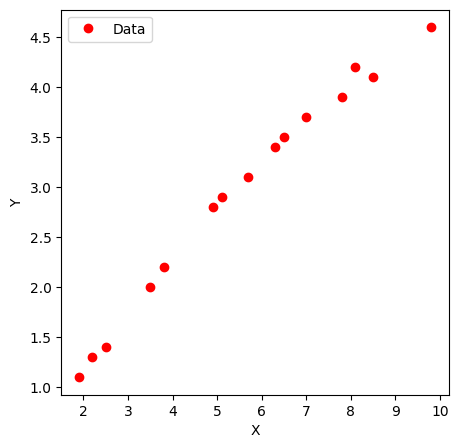

In [29]:
plt.figure(figsize = (5,5))
plt.plot(x_train,y_train, 'ro', label = "Data")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [30]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    output_prediction = self.linear(x)
    return output_prediction

In [37]:
model = LinearRegression()
model

LinearRegression(
  (model): Linear(in_features=1, out_features=1, bias=True)
)

In [38]:
model.state_dict()

OrderedDict([('model.weight', tensor([[-0.9694]])),
             ('model.bias', tensor([0.2071]))])

In [39]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 1000
